In [2]:
# Install JoviSpec
# git clone https://github.com/HajimeKawahara/jovispec.git
# python setup.py install

from decimal import Decimal
from jovispec import abcio
import pkg_resources


jupiter_data = pkg_resources.resource_filename("jovispec", "jupiter_data")

#red 
#rlambc, rspecc, rheadc=abcio.read_qfits("06033",jupiter_data,ext="q")
#rlambw, rspecw, rheadw=abcio.read_qfits("06047",jupiter_data,ext="q")
#rlambe, rspece, rheade=abcio.read_qfits("06049",jupiter_data,ext="q")

#blue
rlambc, rspecc, rheadc=abcio.read_qfits("06034",jupiter_data,ext="q")
rlambw, rspecw, rheadw=abcio.read_qfits("06048",jupiter_data,ext="q")
rlambe, rspece, rheade=abcio.read_qfits("06050",jupiter_data,ext="q")

In [3]:
wavelength_start = 7100.0 #AA
wavelength_end = 7450.0 #AA

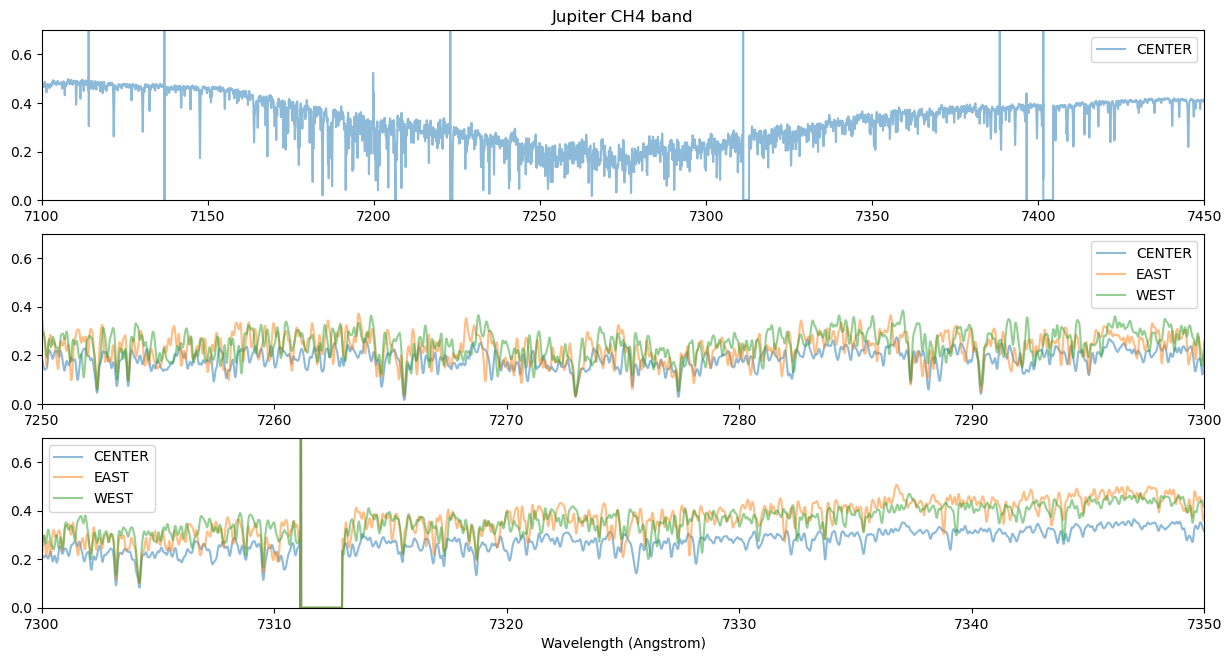

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,7.5))
ax = fig.add_subplot(311)
plt.plot(rlambc,rspecc,alpha=0.5,label="CENTER")
#plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
#plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
plt.ylim(0.0,0.7)
plt.xlim(wavelength_start,wavelength_end)
plt.legend()
plt.title("Jupiter CH4 band")

#plt.xlim(7150.0,7200.0)
ax = fig.add_subplot(312)
plt.plot(rlambc,rspecc,alpha=0.5,label="CENTER")
plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
plt.legend()
plt.ylim(0.0,0.7)
plt.xlim(7250.0,7300.0)
ax = fig.add_subplot(313)
plt.plot(rlambc,rspecc,alpha=0.5,label="CENTER")
plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
plt.legend()
plt.ylim(0.0,0.7)
plt.xlim(7300.0,7350.0)
plt.xlabel("Wavelength (Angstrom)")

plt.savefig("ch4jupiter.png")

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: mode=premodit
The wavenumber grid should be in ascending order.
The users can specify the order of the wavelength grid by themselves.
Your wavelength grid is in ***  descending  *** order


/home/kawahara/exojax/src/exojax/spec/unitconvert.py:60: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(


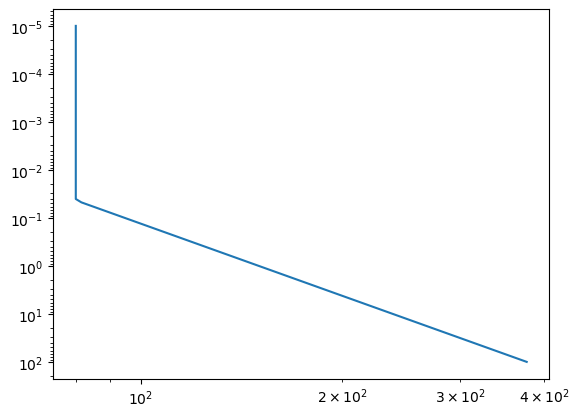

In [24]:
from exojax.utils.grids import wavenumber_grid
from exojax.spec.atmrt import ArtReflectPure

Nnus = 40000
nus, wav, res = wavenumber_grid(wavelength_start, wavelength_end, Nnus, xsmode="premodit", unit="AA")

art = ArtReflectPure(nu_grid=nus, pressure_btm=1.e2, pressure_top=1.e-5, nlayer=100)
art.change_temperature_range(80.0, 500.0)
Tarr = art.powerlaw_temperature(150.0,0.2)
mmr_profile = art.constant_mmr_profile(0.01)

fig= plt.figure()
ax = fig.add_subplot()
ax.plot(Tarr,art.pressure)
ax.invert_yaxis()
plt.yscale("log")
plt.xscale("log")
plt.show()

In [27]:
from exojax.spec.pardb import PdbCloud
from exojax.atm.atmphys import AmpAmcloud

pdb_nh3 = PdbCloud("NH3")
pdb_nh3.load_miegrid()

amp_nh3 = AmpAmcloud(pdb_nh3,bkgatm="H2")
amp_nh3.check_temperature_range(Tarr)

fsed = 1.
sigmag = 2.0
Kzz = 1.e4
VMR = 1.e-4

mu = 2.0  # mean molecular weight
#R = kB / (mu * m_u)
#rho = Parr / (R * Tarr)
from exojax.utils.astrofunc import gravity_jupiter
g=gravity_jupiter(1.0,1.0)

rg_layer, VMRc = amp_nh3.calc_ammodel(art.pressure, Tarr, mu, g, fsed=fsed, sigmag=sigmag, Kzz=Kzz, VMR=VMR)

.database/particulates/virga/virga.zip  exists. Remove it if you wanna re-download and unzip.
Refractive index file found:  .database/particulates/virga/NH3.refrind
Miegrid file exists: .database/particulates/virga/miegrid_lognorm_NH3.mg.npz
pdb.miegrid, pdb.rg_arr, pdb.sigmag_arr are now available. The Mie scattering computation is ready.


/home/kawahara/exojax/src/exojax/atm/atmphys.py:49: UserWarning: min temperature 80.0 K is smaller than min(vfactor t range) 179.10000610351562 K
  warnings.warn(


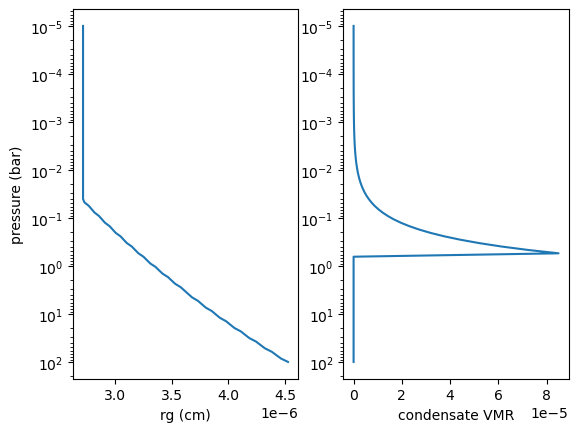

In [28]:
import matplotlib.pyplot as plt
Parr = art.pressure

fig = plt.figure()
ax = fig.add_subplot(121)
plt.plot(rg_layer,Parr)
plt.xlabel("rg (cm)")
plt.ylabel("pressure (bar)")
plt.yscale("log")
ax.invert_yaxis()
ax = fig.add_subplot(122)
plt.plot(VMRc,Parr)
plt.xlabel("condensate VMR")
plt.yscale("log")
#plt.xscale("log")
ax.invert_yaxis()

In [19]:
# high-resolution solar spectrum taken from Meftar et al. (2023) 
# 10.21413/SOLAR-HRS-DATASET.V1.1_LATMOS
# http://doi.latmos.ipsl.fr/DOI_SOLAR_HRS.v1.1.html
# http://bdap.ipsl.fr/voscat_en/solarspectra.html

import pandas as pd
filename = "/home/kawahara/solar-hrs/Spectre_HR_LATMOS_Meftah_V1.txt"
dat = pd.read_csv(filename, names=("wav","flux"), comment=";", delimiter="\t")
dat["wav"] = dat["wav"]*10

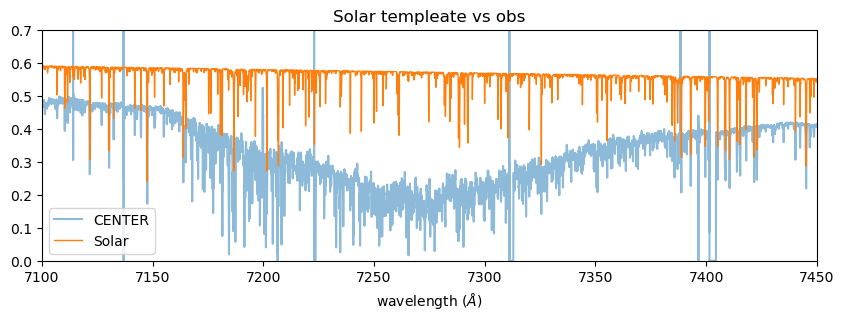

In [70]:
fig = plt.figure(figsize=(10,3))
plt.plot(rlambc,rspecc,alpha=0.5,label="CENTER")
#plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
#plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
vperc = 106.5/300000
plt.plot(dat["wav"]/(1.0+vperc),dat["flux"]*0.34+0.1,lw=1,label="Solar")
plt.ylim(0.0,0.7)
plt.xlim(wavelength_start,wavelength_end)
plt.xlabel("wavelength ($\\AA$)")
plt.legend()
plt.title("Solar templeate vs obs")
plt.savefig("ch4_vs_solar.png")


Text(0.5, 1.0, 'Solar templeate vs obs')

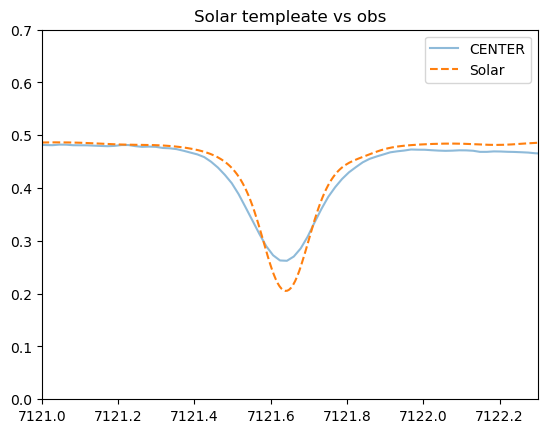

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(rlambc,rspecc,alpha=0.5,label="CENTER")
#plt.plot(rlambe,rspece,alpha=0.5,label="EAST")
#plt.plot(rlambw,rspecw*0.7,alpha=0.5,label="WEST")
vperc = 106.5/300000
plt.plot(dat["wav"]/(1.0+vperc),dat["flux"]*0.34,ls="dashed",label="Solar")
plt.ylim(0.0,0.7)
plt.xlim(wavelength_start,wavelength_end)
#plt.xlim(7150,7200)
plt.xlim(7121,7122.3)
plt.legend()
plt.title("Solar templeate vs obs")


In [8]:
dat["wav"][::100]

0             0.500000
100         100.500000
200         123.550000
300         128.550000
400         133.550000
              ...     
2415600    4391.222824
2415700    4393.151955
2415800    4395.082781
2415900    4397.015306
2416000    4398.949531
Name: wav, Length: 24161, dtype: float64